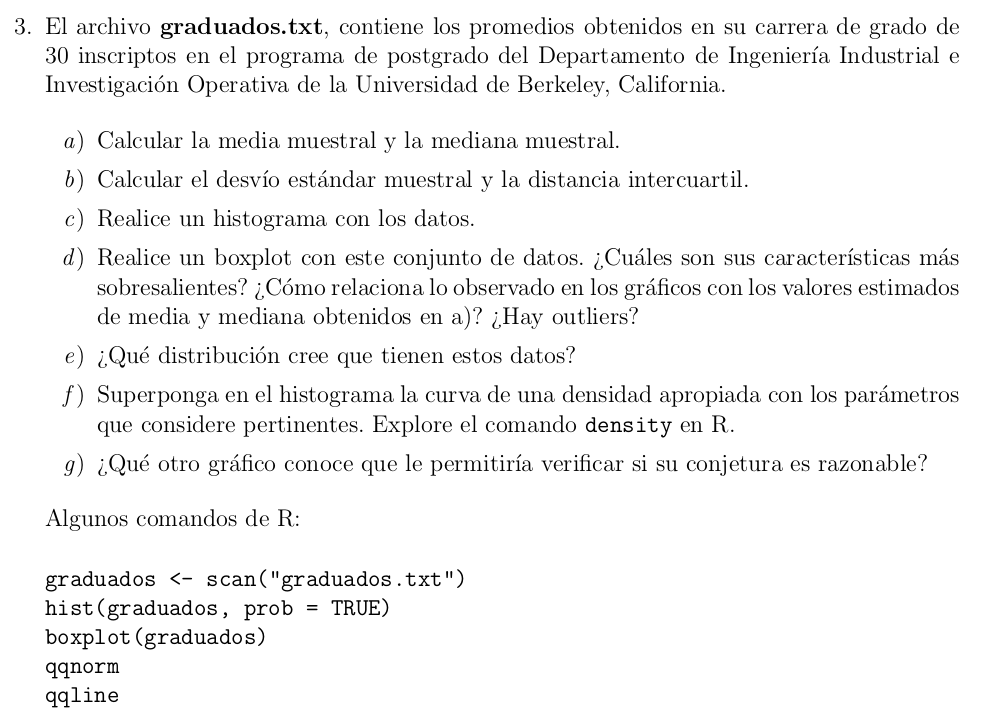

A por ellos:

In [174]:
graduadis <- scan("./data/practica6/graduados.txt")

Primero, observamos los datos:

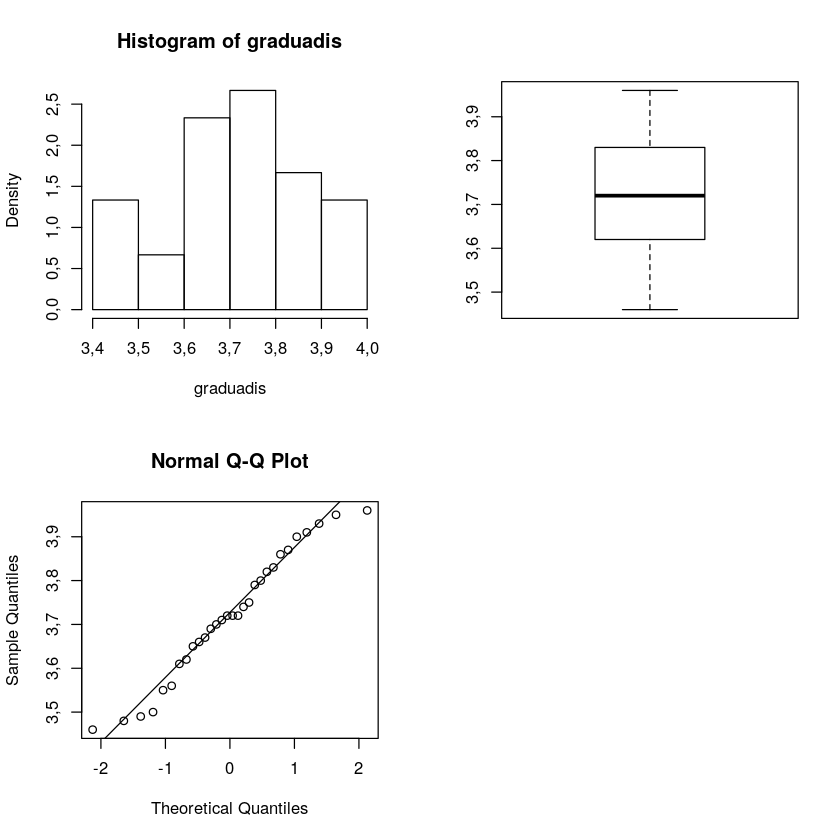

In [175]:
par(mfrow=c(2,2))

hist(graduadis, prob=TRUE)

boxplot(graduadis)

qqnorm(graduadis)

qqline(graduadis)

In [176]:
# a)

# Media Muestral:
mean(graduadis)

# Mediana Muestral:
median(graduadis)

[1] 3,720667

[1] 3,72

In [177]:
# b)

# Desvio estandar
print("Desvío estándar:")
sd(graduadis)


# Cuartiles
print("Cuartiles:")
quantile(graduadis)

# Distancia intercuartil
print("Distancia intercuartil (usando cmd IQR):")
IQR(graduadis)

# IQR a mano:
print("Distancia intercuartil (como resta de cuartiles):")
quantile(graduadis, 0.75, names=FALSE) - quantile(graduadis, 0.25, names=FALSE)

[1] "Desvío estándar:"


[1] 0,1456717

[1] "Cuartiles:"


0%    25%    50%    75%   100% 
3,4600 3,6275 3,7200 3,8275 3,9600

[1] "Distancia intercuartil (usando cmd IQR):"


[1] 0,2

[1] "Distancia intercuartil (como resta de cuartiles):"


[1] 0,2

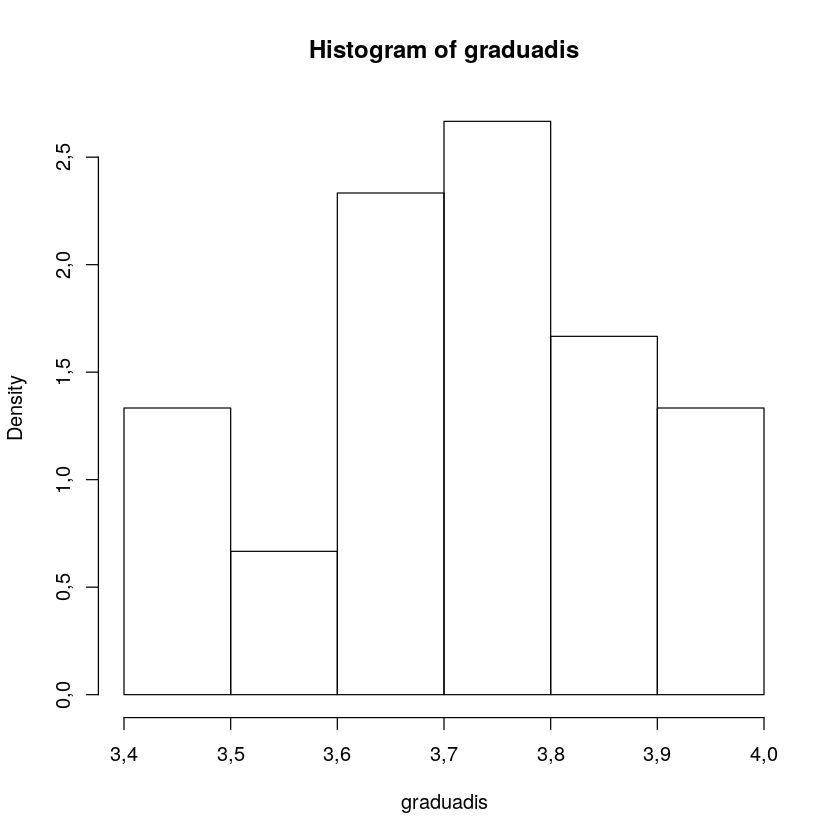

In [178]:
# c)

hist(graduadis, prob=TRUE)

In [179]:
# d)
# Muy filosofico


e) Los datos parecen tener distribución $Normal$ con media $\mu = 3.7$ y varianza $\sigma^2 = 0.15^2$, pues qqplot e histograma tienen forma de, y porque ésta práctica es sobre eso (podría ser ***t-Student*** o alguna otra parecida)

In [293]:
# No se usar density. Defino mi propia densidad normal con juegos de azar y mujerzuelas
densidad_normal <- function(x, mu=3.7, var=0.0225){
    return ( 1/sqrt(2*pi*var) * exp( - (x-mu)**2 / (2*var) ) )
}
# Genero grilla de valores normales
# Uso outer: Paso parametros x=a y mu=0 para cada a en seq(-3,3,0.1)
gridNormal <- outer(seq(3.2, 4.2, 0.01), 3.7, densidad_normal)
# Aumento la dimension del vector en 1
gridNormal <- matrix(c(seq(3.2, 4.2, 0.01), gridNormal), ncol=2)

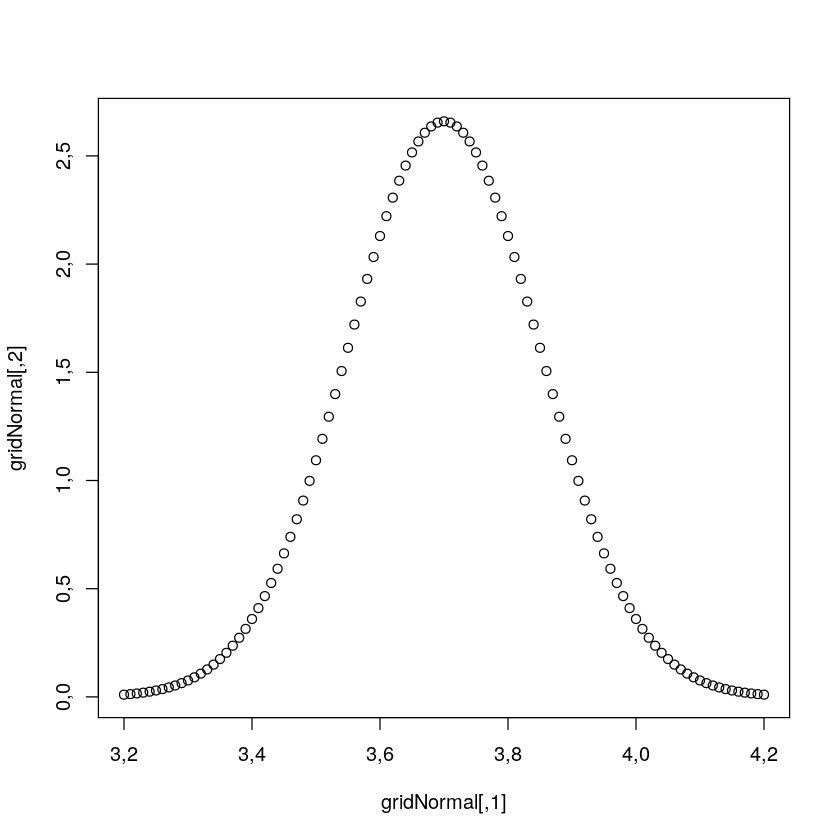

In [294]:
plot(gridNormal)

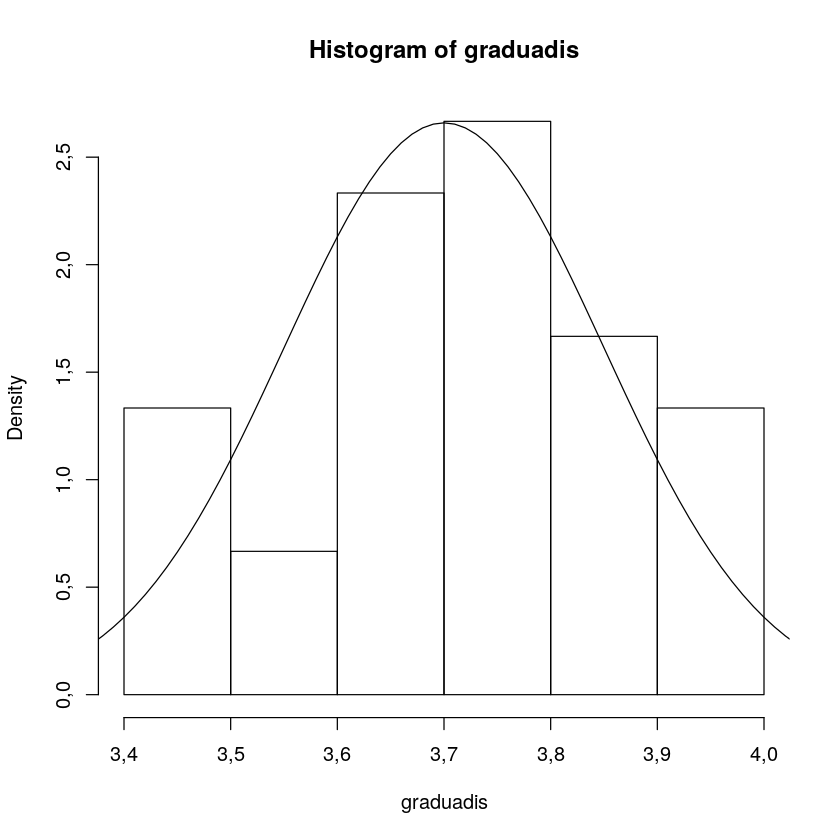

In [297]:
hist(graduadis, freq=FALSE)
#lines(density(graduadis), xlim = c(-3.3, 4.1))  # IQR = 0
lines(gridNormal)  # IQR = 0

In [249]:
?density
#plot(density(), xlim = c(-4, 4))  # IQR = 0


In [237]:
plot(density(data))

ERROR: Error in density.default(data): argument 'x' must be numeric


In [183]:
?density

In [184]:
#TODO: Aprender a usar density para no tener que reescribir la función de densidad de una gaussiana

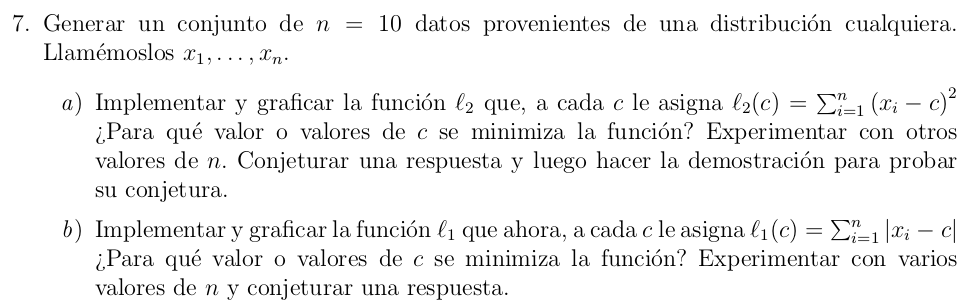

Éste me copa. Lo vimos con Daniela.

Spoiler: es la esperanza.

In [185]:
datos <- rnorm(1000, mean=0.757, sd=1)
datos[1:10]

[1]  0,46677267  2,97679443 -0,67940486 -0,06180262 -0,23894511 -0,35678481
 [7]  0,40707002  1,81175012  2,10093138  2,19354809

In [186]:
l2 <- function(data, c){
    return (sum((data-c)**2))
}

In [187]:
# Distancia l2 de todos los puntos de datos con 1
l2(datos, 1)

[1] 1009,187

In [188]:
distancias_l2 <- function(data, desde=-2, hasta=2, step=0.01){
    distancias <- rep(0, (hasta-desde)/step)
    distancias <- data.frame (
        c = seq(desde, hasta, step),
        d = rep(0, length(c))
    )
    i <- 1
    for(c in distancias$c){
        distancias$c[i] <- c
        distancias$d[i] <- l2(data, c)
        i <- i+1
    }
    return (distancias)
}

In [189]:
distanciasL2Grid <- distancias_l2(datos)
head(distancias)

c,d
"-2,00","2776,551"
"-1,99","2766,611"
"-1,98","2756,671"
"-1,97","2746,731"
"-1,96","2736,791"
"-1,95","2726,851"


[1] 949,1397

[1] 0,75

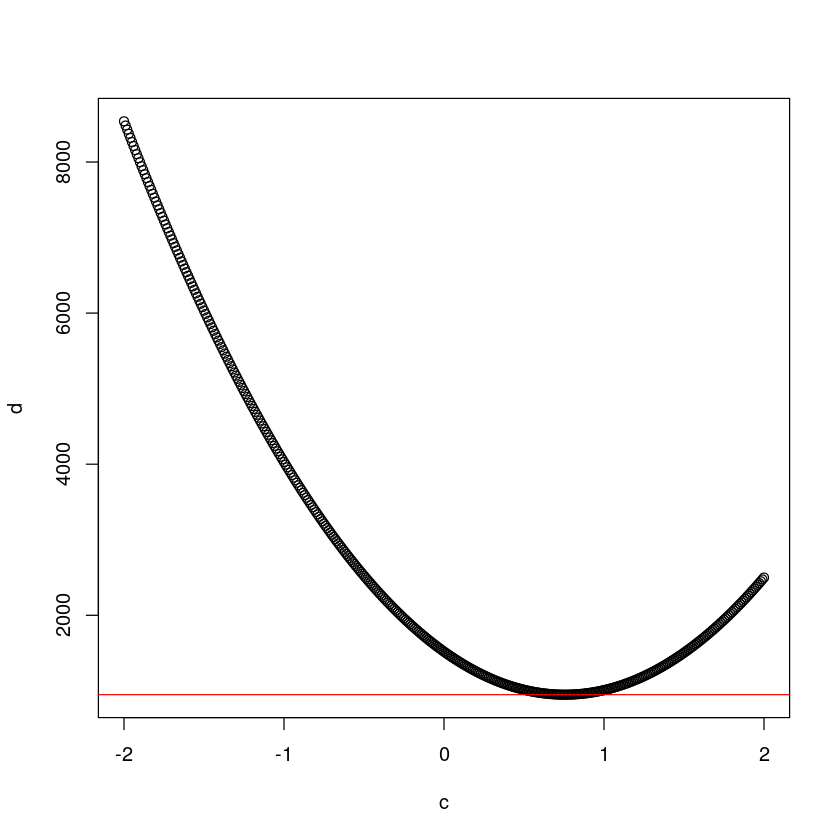

In [195]:
plot(distanciasL2Grid)
abline(h=min(distanciasL2Grid$d), col='red')
min(distanciasL2Grid$d)
distancias$c[distanciasL2Grid$d == min(distanciasL2Grid$d)]

In [192]:
# b)

l1 <- function(data, c){
    return (sum(abs(data-c)))
}

distancias_l1 <- function(data, desde=-2, hasta=2, step=0.01){
    distancias <- rep(0, (hasta-desde)/step)
    distancias <- data.frame (
        c = seq(desde, hasta, step),
        d = rep(0, length(c))
    )
    i <- 1
    for(c in distancias$c){
        distancias$c[i] <- c
        distancias$d[i] <- l1(data, c)
        i <- i+1
    }
    return (distancias)
}

c,d
"-2,00","2755,464"
"-1,99","2745,524"
"-1,98","2735,584"
"-1,97","2725,644"
"-1,96","2715,704"
"-1,95","2705,764"


[1] 769,4227

[1] 0,74

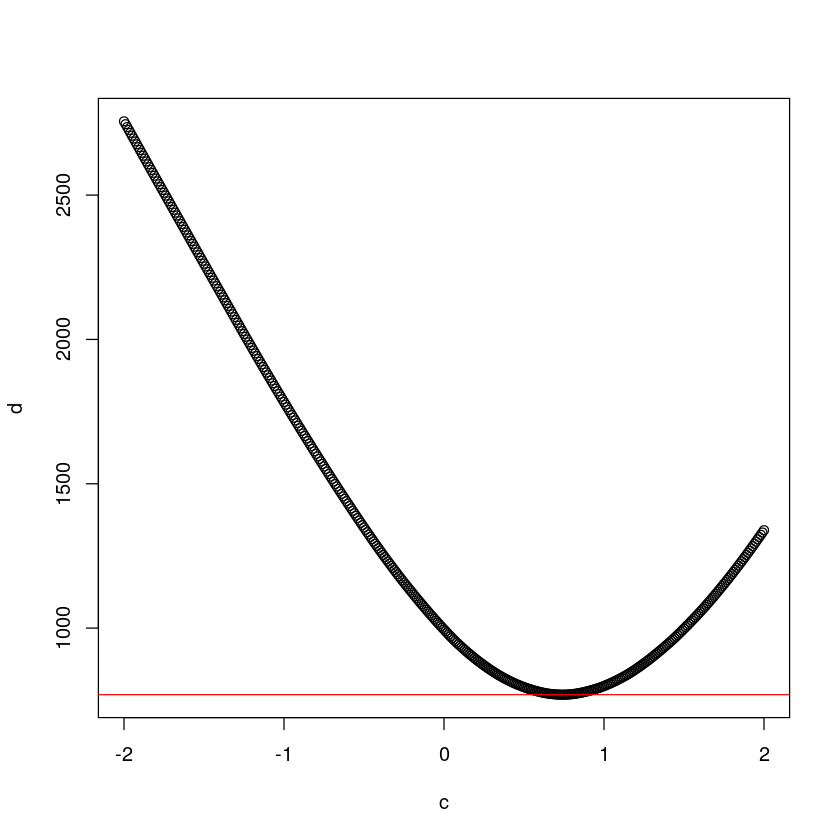

In [194]:
distanciasL1Grid <- distancias_l1(datos)
head(distanciasL1Grid)

plot(distanciasL1Grid)
abline(h=min(distanciasL1Grid$d), col='red')
min(distanciasL1Grid$d)
distancias$c[distanciasL1Grid$d == min(distanciasL1Grid$d)]

No parecen ser muy diferentes, hasta que...

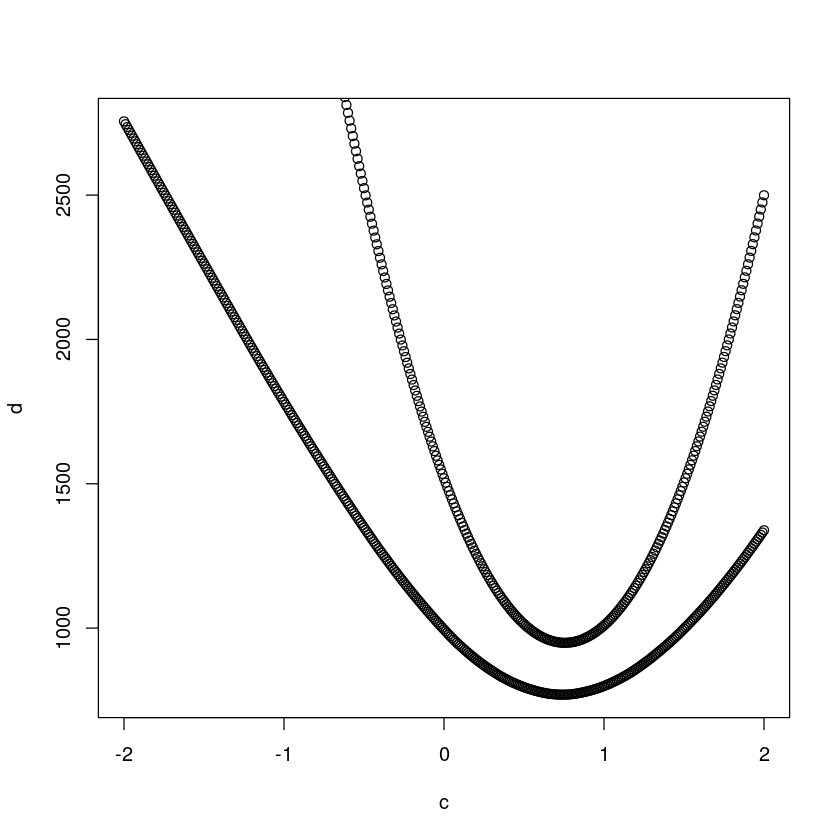

In [199]:
plot(distanciasL1Grid)
points(distanciasL2Grid)

Y para valores más chicos de n?

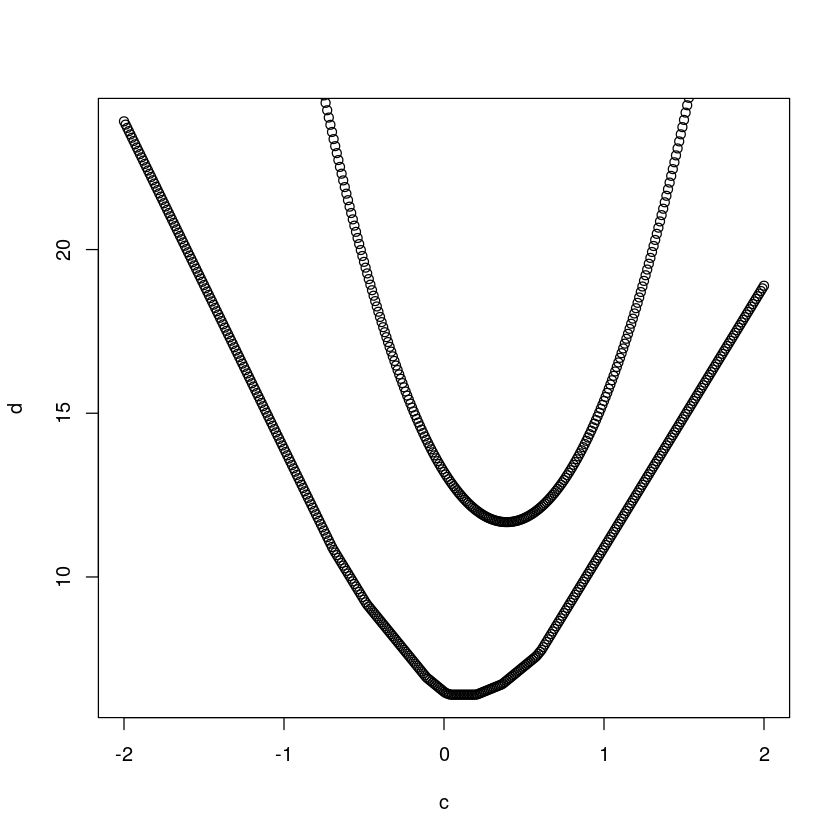

In [207]:
n <- 10
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
points(distanciasL2Grid)

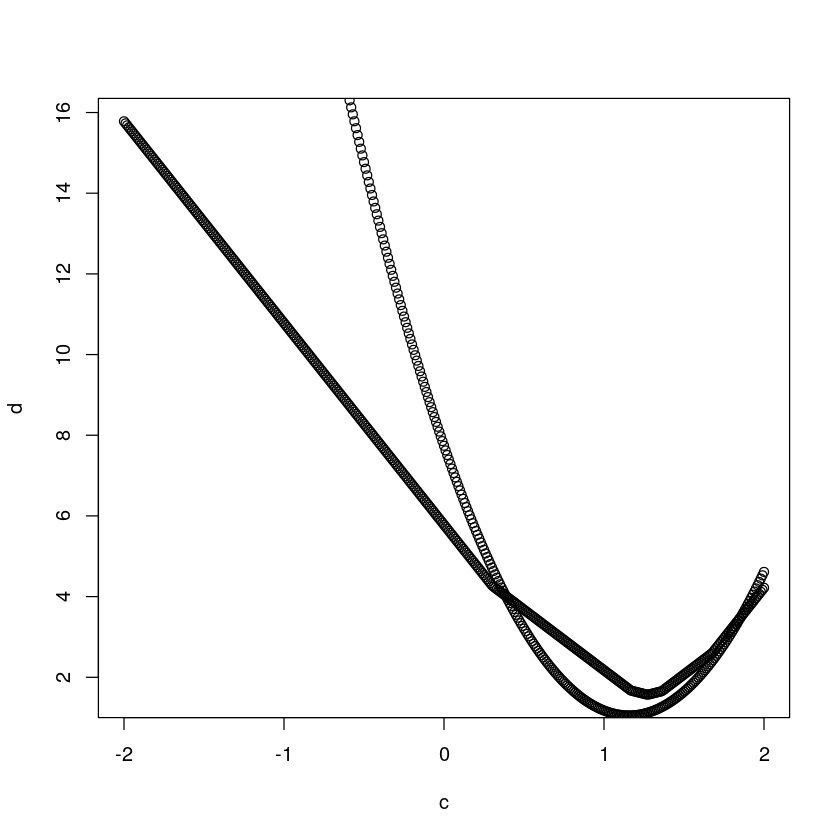

In [208]:
n <- 5
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
points(distanciasL2Grid)

Qué pasaría con n=1? o sea, una muestra de un solo dato.

[1] 0,5001569

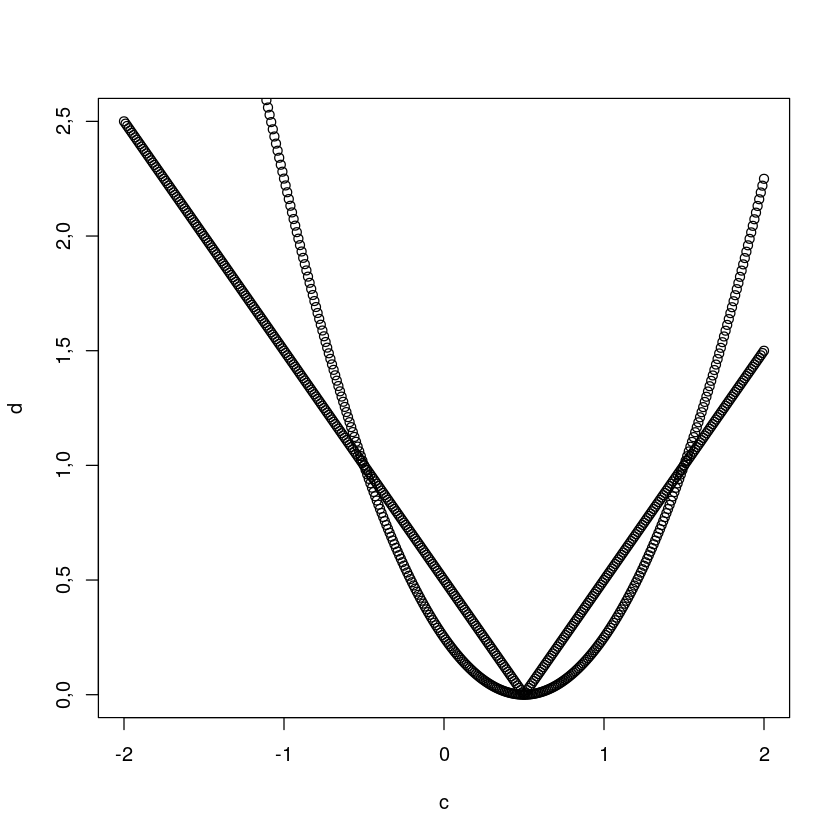

In [219]:
n <- 1
datos <- rnorm(n, mean=0.757, sd=1)
distanciasL2Grid <- distancias_l2(datos)
distanciasL1Grid <- distancias_l1(datos)
plot(distanciasL1Grid)
points(distanciasL2Grid)
datos

Puede deducir cuál corresponde a la distancia l2 y cual a la que no es continua?

(?

In [211]:
?points